# Introduction to SQL
    
In Week 1 you cleaned the data obtained from `lacity.org` that recorded details on traffic accidents.  You prepped this data to load it into a SQL database. But what we will see as we continue to analyze the data, is that there is more cleaning that needs to happen.
    
## Deliverables:
- Submit two files that has the name <span style='color:red'><b> YourLastName_Exercise_2: </span></b>
    1. Your **HTML** file that has your Source code and output
    2. Your **ipynb script** that has your Source code and output
    
## Objectives:
In this exercise you will use data cleaned from Week 1 of our class:
- Load data from csv file into a DataFrame Object
- Analyze the data using SQL and Python
- Use sqlalchemy to load data stored in a DataFrame object into SQLite database engine
- Use sqlalchemy to connect to SQLite database engine to execute SQL queries
- Execute different SQL queries


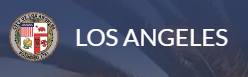

https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w

### Structured Query Language (SQL) versus Python

The discussion board this week has you comparing the use of SQL to a general purpose language like Python.  What you will be able to test out this week in the homework is the mixing/matching of using SQL and Python to analyze data.

In [1]:
# load libraries
import pandas as pd
import numpy as np
# https://docs.sqlalchemy.org/en/13/intro.html
import sqlalchemy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# ------------------------------------------------------
# read in file from Week 1
# ------------------------------------------------------
df = pd.read_csv("Final Traffic.csv")

# check out fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549547 entries, 0 to 549546
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DR_Number           549547 non-null  int64  
 1   Date                549547 non-null  object 
 2   Division            549547 non-null  object 
 3   Reporting_District  549547 non-null  int64  
 4   Age                 549547 non-null  int64  
 5   Gender              549547 non-null  object 
 6   Descent             549547 non-null  object 
 7   Year                549547 non-null  int64  
 8   Month               549547 non-null  int64  
 9   Day                 549547 non-null  int64  
 10  Hour                549547 non-null  int64  
 11  imputeAge           549547 non-null  bool   
 12  Latitude            549547 non-null  float64
 13  Longitude           549547 non-null  float64
dtypes: bool(1), float64(2), int64(7), object(4)
memory usage: 55.0+ MB


In [3]:
# look at the first 5 records
df.head()

,DR_Number,Date,Division,Reporting_District,Age,Gender,Descent,Year,Month,Day,Hour,imputeAge,Latitude,Longitude
0,190319651,08/24/2019,Southwest,356,22,Male,Hispanic,2019,8,24,4,False,34.0255,-118.3002
1,190319680,08/30/2019,Southwest,355,30,Female,Hispanic,2019,8,30,23,False,34.0256,-118.3089
2,190413769,08/25/2019,Hollenbeck,422,40,Male,Unknown,2019,8,25,5,True,34.0738,-118.2078
3,190127578,11/20/2019,Central,128,21,Male,Hispanic,2019,11,20,3,False,34.0492,-118.2391
4,190319695,08/30/2019,Southwest,374,49,Male,Black,2019,8,30,21,False,34.0108,-118.3182


### Load traffic data into a table in a SQLite database

- we are creating a database called `LAtraffic`
- we are creating a table called `traffic`


In [4]:
# 'engine' will be used to reference the database
engine = create_engine('sqlite:///LAtraffic.db')

df.to_sql('traffic', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('traffic', engine).columns

549547

Index(['DR_Number', 'Date', 'Division', 'Reporting_District', 'Age', 'Gender',
       'Descent', 'Year', 'Month', 'Day', 'Hour', 'imputeAge', 'Latitude',
       'Longitude'],
      dtype='object')

### Next read in the MO file we created earlier in the class and add to the database

- we are creating a table in the `LAtraffic` database called `MO_accident`

In [5]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo = pd.read_csv("MO per accident.csv",dtype = {'MO_Codes':'str'})

mo.to_sql('MO_accident', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('MO_accident', engine).columns

3033153

Index(['DR_Number', 'MO_Codes'], dtype='object')

### Now read in a file that contains all MO codes and a description of what they mean

- we are creating a table in the `LAtraffic` database called `MO_master`

In [6]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo_mast = pd.read_csv("MO master.csv", dtype = {'Codes':'str'})

mo_mast.to_sql('MO_master', engine, if_exists = 'replace', index = False)
# check out the columns
pd.read_sql_table('MO_master', engine).columns

777

Index(['Codes', 'Description'], dtype='object')

### You can see the three tables that are now saved into the `LAtraffic` database

In [7]:
from sqlalchemy import schema
xMetaData = schema.MetaData(bind = engine)
xMetaData.reflect()
# will show table names
xMetaData.tables.keys()

dict_keys(['MO_accident', 'MO_master', 'traffic'])

### Simple query using * to select all columns

- Clean, easy-to-read code has main query commands each on a new line (SELECT and FROM on separate lines)
- SELECT specifies the columns in a table
- FROM specifies the table name
- engine refers to the database named in the create_engine cell

In [8]:
# using pandas read_sql_query returns a dataframe
q1 = pd.read_sql_query("SELECT * \
                        FROM MO_accident", engine)
q1.head(10)

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003
5,190319680,3037
6,190319680,3006
7,190319680,3028
8,190319680,3030
9,190319680,3039


In [9]:
# same query, but you can choose to have query string separate
qstring = "SELECT * \
           FROM MO_accident"
q1a = pd.read_sql_query(qstring, engine)
q1a.head()

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003


In [10]:
# can use three single quotes and then no need for \ for line continuation
query = '''SELECT * 
           FROM MO_accident'''
q1b = pd.read_sql_query(query, engine)
q1b.head()

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003


### Using SELECT for specific fields

- can individually pull out specific fields

In [11]:
q2 = pd.read_sql_query("SELECT Division, Gender, Age \
                        FROM traffic", engine)
q2.head(10)

,Division,Gender,Age
0,Southwest,Male,22
1,Southwest,Female,30
2,Hollenbeck,Male,40
3,Central,Male,21
4,Southwest,Male,49
5,Hollenbeck,Male,60
6,Harbor,Male,73
7,Southwest,Male,39
8,Southwest,Male,48
9,Hollenbeck,Male,68


In [107]:
q2['Gender'].value_counts()

Male      324496
Female    209881
Other      15170
Name: Gender, dtype: int64

### Can count and group the results

- `Count(*)` will count the rows that qualify
- `AS` allows you to rename the result to a more user friendly column name (in this example 'Accidents')
- `GROUP BY` is how the counts are accumulated - in this case by MO_Codes

**SQL Aggregate Functions**
- COUNT:  returns number of values in a specific column
- SUM: returns the sum of the values in a specific column
- AVG: returns the average of the values in a specific column
- MIN: returns the smallest value in a specific column
- MAX: returns the largest value in a specific column

In [12]:
# count of MO codes
q3 = pd.read_sql_query("SELECT MO_Codes, count(*) AS Accidents \
                        FROM MO_accident \
                        GROUP BY MO_Codes ", engine)
q3

,MO_Codes,Accidents
0,0100,5
1,0101,943
2,0102,21
3,0103,6
4,0104,7
...,...,...
325,4024,4753
326,4025,35028
327,4026,80404
328,4027,56145


### ORDER BY will determine the output order

In [13]:
# count of MO codes
q4 = pd.read_sql_query("SELECT MO_Codes, count(*) AS Count \
                        FROM MO_accident \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q4

,MO_Codes,Count
0,3101,402493
1,3701,327780
2,3401,327721
3,3004,242872
4,3037,212281
...,...,...
325,0316,1
326,0310,1
327,0309,1
328,0118,1


### Check out the MO_master table

In [14]:
# what is in the MO_master table?
query = "SELECT * \
         FROM MO_master"
q5 = pd.read_sql_query(query, engine)
q5.head(10)

,Codes,Description
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Crippled
4,0104,Customer
5,0105,Delivery
6,0106,Doctor
7,0107,God
8,0108,Infirm
9,0109,Inspector


### Joining two tables using WHERE clause

- in the `WHERE` line below we are joining the **MO_accident** table with the **MO_master** table
- the two tables are being joined on the MO_Codes column of the MO_accident table and the Codes column of the MO_master table
- this type of join is called an Inner Join

<div>
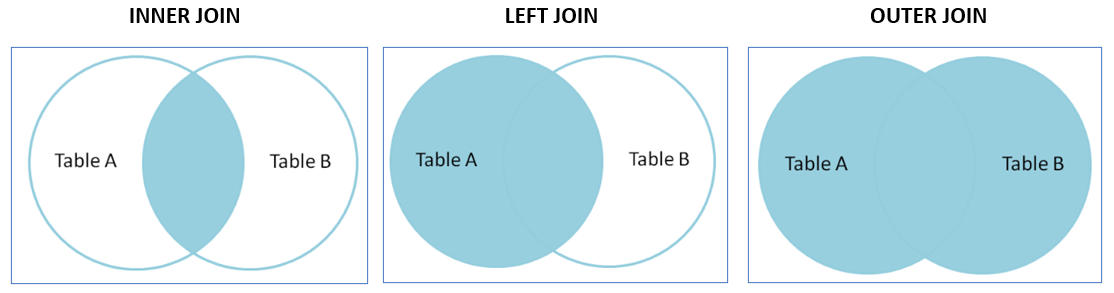
</div>


<div>
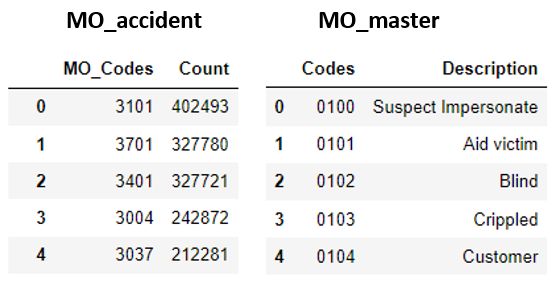
</div>


In [15]:
# look at MO codes with descriptions
q6 = pd.read_sql_query("SELECT MO_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q6.head(20)

,MO_Codes,Description,Count
0,3101,T/C - PCF (A) In the Narrative,402493
1,3701,T/C - Movement Preceding Collision,327780
2,3401,T/C - Type of Collision,327721
3,3004,T/C - Veh vs Veh,242872
4,3037,T/C - At Intersection - No,212281
5,3030,T/C - Hit and Run Misd,184005
6,3028,T/C - (N) Non Injury,149323
7,3026,T/C - (C) Complaint of Injury,133923
8,3036,T/C - At Intersection - Yes,116366
9,3006,T/C - Veh vs Parked Veh,102339


### Using JOIN to connect two tables

In [16]:
# same query as above but using JOIN to connect the tables
q6a = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a \
                        JOIN MO_master m ON a.MO_Codes = m.Codes \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q6a.head(20)

,MO_Codes,Description,Count
0,3101,T/C - PCF (A) In the Narrative,402493
1,3701,T/C - Movement Preceding Collision,327780
2,3401,T/C - Type of Collision,327721
3,3004,T/C - Veh vs Veh,242872
4,3037,T/C - At Intersection - No,212281
5,3030,T/C - Hit and Run Misd,184005
6,3028,T/C - (N) Non Injury,149323
7,3026,T/C - (C) Complaint of Injury,133923
8,3036,T/C - At Intersection - Yes,116366
9,3006,T/C - Veh vs Parked Veh,102339


### Using WHERE to select a subset of data

- equals: =
- not equals: <> or != 
- is less than: <
- is greater than: >
- is less than or equal to: <= 
- is greater than or equal to: >=

In [17]:
# isolating 2010 data
q7 = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                        FROM traffic \
                        WHERE Year = 2010 \
                        GROUP BY Month \
                        ORDER BY Month", engine)
q7

,Month,Count
0,1,3629
1,2,3440
2,3,3796
3,4,3621
4,5,3748
5,6,3575
6,7,3698
7,8,3618
8,9,3512
9,10,3977


### Logical Operators

- `AND`, `OR` and `NOT`
- Expressions are evaluated left to right
- Subexpressions in brackets are evaluated first
- NOT is evaluated before AND and OR
- AND is evaluated before OR

In [18]:
# isolating 2010 data along with Jan, Feb and March
q7a = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                        FROM traffic \
                        WHERE Year < 2011 AND Month < 4\
                        GROUP BY Month \
                        ORDER BY Month", engine)
q7a

,Month,Count
0,1,3629
1,2,3440
2,3,3796


### BETWEEN and NOT BETWEEN

- Note that BETWEEN values are inclusive with month 1, 2, 3 and 4 qualifying with the query below.



In [19]:
# isolating 2010 data
q7b = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                         FROM traffic \
                         WHERE Year < 2011 AND Month BETWEEN 1 and 4\
                         GROUP BY Month \
                         ORDER BY Month", engine)
q7b

,Month,Count
0,1,3629
1,2,3440
2,3,3796
3,4,3621


### IN and NOT IN

- Tests whether a data value matches one of a list of values
- Must be an exact match

In [20]:
q8 = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes AND \
                        Description IN ('T/C - Hit and Run Misd')\
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q8.head(20)

,MO_Codes,Description,Count
0,3030,T/C - Hit and Run Misd,184005


### LIKE and NOT LIKE

- Searces for a string appearing somewhere within the data column

In [21]:
q9 = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes AND \
                        Description LIKE '%Hit%' \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q9.head(20)

,MO_Codes,Description,Count
0,3030,T/C - Hit and Run Misd,184005
1,3029,T/C - Hit and Run Fel,42572
2,0416,Hit-Hit w/ weapon,78
3,1207,Hitchhiker,1
4,0450,Suspect shot at victim (no hits),1


### Let's use Latitutude and Longitude to do a quick analysis of accuracy of location data

### Cleaning data is iterative process

- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
- there are some outliers in our make shift map that need to be removed

In [22]:
z1 = pd.read_sql_query("SELECT Latitude, Longitude, Division \
                        FROM traffic", engine)
z1.head()


,Latitude,Longitude,Division
0,34.0255,-118.3002,Southwest
1,34.0256,-118.3089,Southwest
2,34.0738,-118.2078,Hollenbeck
3,34.0492,-118.2391,Central
4,34.0108,-118.3182,Southwest


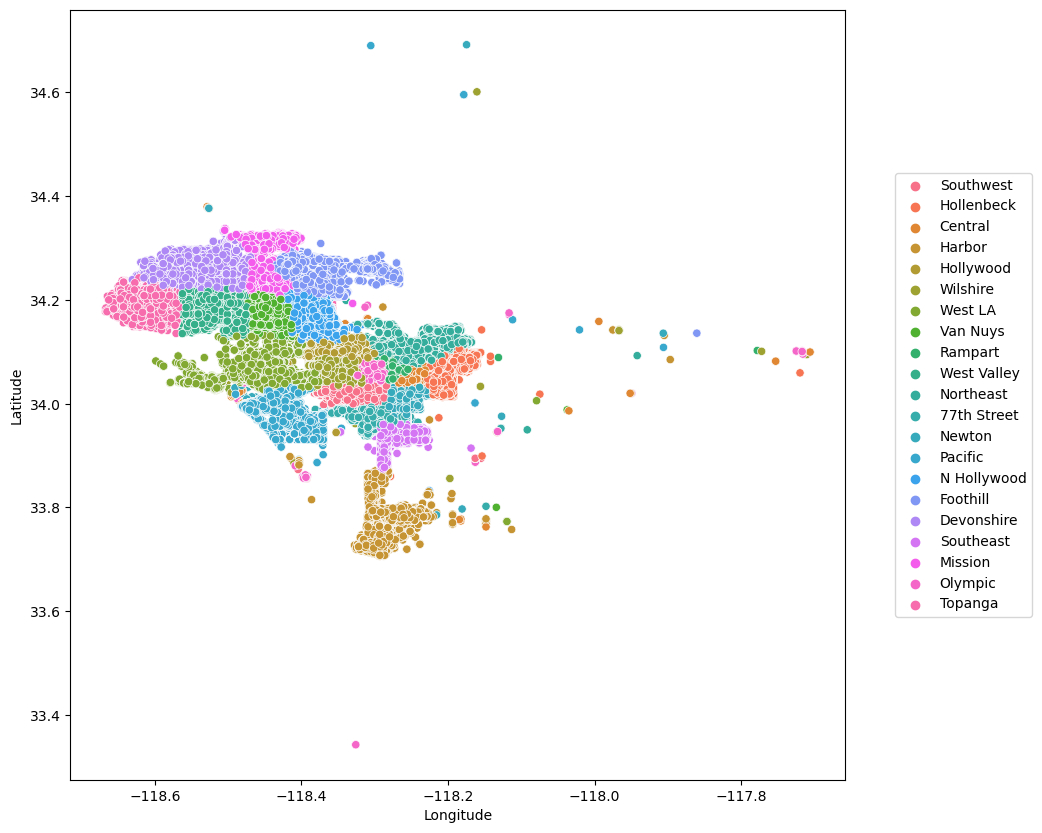

In [23]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = "Division", data = z1, legend = 'full')
ax.legend(loc='right',bbox_to_anchor=(1.25,0.5),ncol=1)

### The query below is selecting the data using SQL, but then using Python to summarize the findings

In [24]:
# query example used for homework requirement 1
q10 = pd.read_sql_query("SELECT Division \
                         FROM traffic", engine)

# now using python to summarize
q10['Division'].value_counts()

77th Street    37162
Southwest      32953
Wilshire       30340
N Hollywood    29169
Newton         28290
Olympic        28268
West LA        27761
Pacific        27653
Van Nuys       27646
Devonshire     27067
West Valley    26794
Hollywood      25865
Northeast      24732
Mission        24199
Southeast      24141
Topanga        23657
Central        22503
Harbor         20996
Rampart        20838
Hollenbeck     20037
Foothill       19476
Name: Division, dtype: int64

<div class="alert alert-block alert-warning">
    
## Requirements:
Answer the homework questions below.  Add cells as needed. Make sure all cells are run before you save to HTML.
</div>

<div class="alert alert-block alert-warning"> 
    <b> Requirement 1 : (5 points) </b> Using <b>SQL query only</b>, produce output similar to value_counts output that shows Division and the count for each division with the highest count shown first (see output for q10). 
    
   


</div>

In [25]:
r1 = pd.read_sql_query("""
                        SELECT Division, COUNT(DIVISION) AS COUNT
                        FROM traffic
                        GROUP BY DIVISION
                        ORDER BY COUNT DESC
                        """, engine)
r1

,Division,COUNT
0,77th Street,37162
1,Southwest,32953
2,Wilshire,30340
3,N Hollywood,29169
4,Newton,28290
5,Olympic,28268
6,West LA,27761
7,Pacific,27653
8,Van Nuys,27646
9,Devonshire,27067


<div class="alert alert-block alert-warning"> 
<b> Requirement 2 : (5 points) </b>  Show the minimum, maximum and mean values for the Age column.  Do this only using <b>SQL</b>.
    
   


</div>

In [26]:
r2 = pd.read_sql_query("""
                        SELECT 
                            MIN(Age) AS min_age,
                            MAX(Age) AS max_age,
                            AVG(Age) AS mean_age
                        FROM traffic
                        """, engine)
r2

,min_age,max_age,mean_age
0,16,98,40.396983


<div class="alert alert-block alert-warning"> 
<b> Requirement 3 : (5 points) </b>  Find all Divisions with the word 'west' within the division title. Show the number of accidents in these Divisions.  Do this only using <b>SQL</b>. Sort with highest accident count showing on top.
    
   


</div>

In [27]:
r3_qa = pd.read_sql_query("""
                        SELECT 
                            *
                        FROM traffic
                        """, engine)

west_names = r3_qa[r3_qa['Division'].str.contains("west",case=False)]['Division'].unique()
west_names

array(['Southwest', 'West LA', 'West Valley'], dtype=object)

In [28]:
r3 = pd.read_sql_query("""
                        SELECT 
                            DIVISION,
                            COUNT(Age) AS ACCIDENTS
                        FROM traffic
                        WHERE Division LIKE '%west%'
                        GROUP BY Division
                        """, engine)
r3

,Division,ACCIDENTS
0,Southwest,32953
1,West LA,27761
2,West Valley,26794


<div class="alert alert-block alert-warning"> 
<b> Requirement 4: (10 points) </b> Let's analyze the accidents for teenagers, 16 to 19, and for the older group over 80.

1. Use SQL to select those in the age ranges described.
2. Based on percentage, how does the younger group differ from the older group by Gender? (Answer with Python)
3. Based on percentage, how does the younger group differ from the older group by Descent? (Answer with Python)
    
   


</div>

In [98]:
r4 = pd.read_sql_query("""
                        SELECT 
                            Descent,
                            Age,
                            Gender,
                            CASE
                                WHEN Age BETWEEN 16 AND 19 THEN 'younger'
                                WHEN Age >= 80 THEN 'older'
                                ELSE 'in-between'
                            END as age_group
                        FROM traffic
                        WHERE age_group != 'in-between'
                        """, engine)
r4

,Descent,Age,Gender,age_group
0,Unknown,18,Other,younger
1,Unknown,18,Male,younger
2,White,18,Female,younger
3,Other,18,Female,younger
4,Black,19,Female,younger
...,...,...,...,...
12286,Hispanic,19,Male,younger
12287,Black,18,Male,younger
12288,Black,18,Female,younger
12289,Other,17,Male,younger


In [99]:
r4_gender_grouped = r4.groupby(['age_group','Gender']).agg(counts=('Gender','size'))
r4_gender_grouped['percentage'] = r4_gender_grouped.groupby(level=0).transform(lambda x: (x / x.sum()).round(3))
r4_gender_grouped

counts  percentage
age_group Gender                    
older     Female    2002       0.408
          Male      2892       0.590
          Other       10       0.002
younger   Female    1420       0.192
          Male      3021       0.409
          Other     2946       0.399

<AxesSubplot:xlabel='Gender', ylabel='percentage_older'>

<AxesSubplot:xlabel='Gender', ylabel='percentage_younger'>

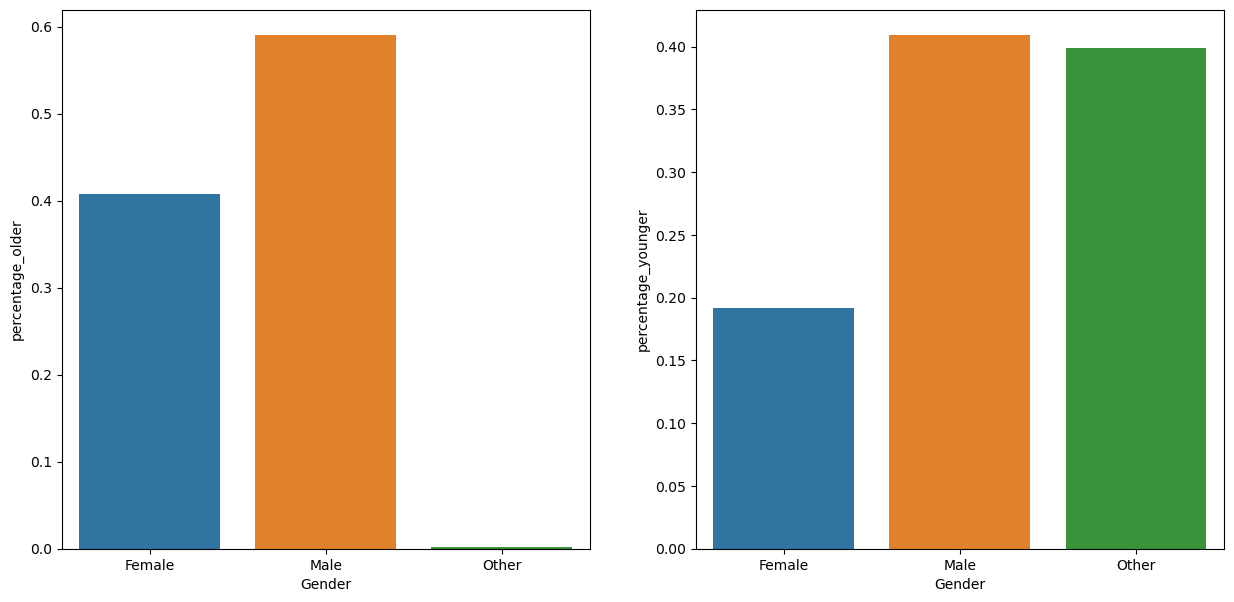

In [100]:
#using sns
r4_gender_unstack = r4_gender_grouped.unstack(level=0)
r4_gender_unstack.columns = r4_gender_unstack.columns.map('_'.join)
r4_gender_unstack.reset_index(inplace=True)

fig_gender, axs_gender = plt.subplots(ncols=2,figsize=(15, 7))
sns.barplot(x='Gender',y='percentage_older',data=r4_gender_unstack, ax=axs_gender[0])
sns.barplot(x='Gender',y='percentage_younger',data=r4_gender_unstack, ax=axs_gender[1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([<AxesSubplot:ylabel='older'>, <AxesSubplot:ylabel='younger'>],
      dtype=object)

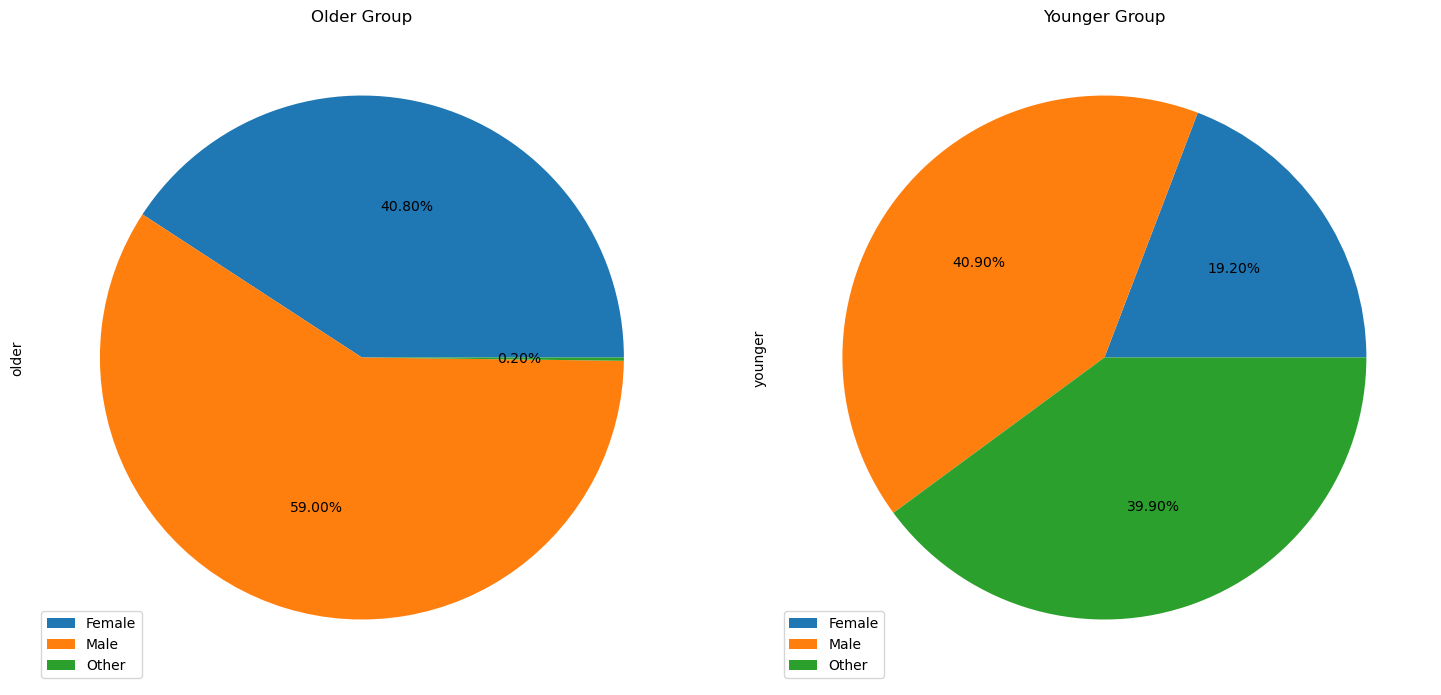

In [146]:
r4_fig, r4_ax = plt.subplots(ncols=2,figsize=(15, 7))
r4_gender_grouped.unstack(level=0).plot(y='percentage',kind='pie',subplots=True,rot=0,autopct='%.2f%%',ax=r4_ax,labels=['','',''])
r4_ax[0].legend(loc=3, labels=r4_gender_grouped.index.get_level_values(1))
r4_ax[0].title.set_text('Older Group')
r4_ax[1].legend(loc=3, labels=r4_gender_grouped.index.get_level_values(1))
r4_ax[1].title.set_text('Younger Group')
plt.tight_layout()

In [103]:
r4_descent_grouped = r4.groupby(['age_group','Descent']).agg(counts=('Descent','size'))
r4_descent_grouped['percentage'] = r4_descent_grouped.groupby(level=0).transform(lambda x: (x / x.sum()).round(3))
r4_descent_grouped

counts  percentage
age_group Descent                     
older     Asian        425       0.087
          Black        702       0.143
          Hispanic     748       0.153
          Other        618       0.126
          Unknown       79       0.016
          White       2332       0.476
younger   Asian        103       0.014
          Black        475       0.064
          Hispanic    1881       0.255
          Other       1020       0.138
          Unknown     3274       0.443
          White        634       0.086

<AxesSubplot:xlabel='age_group'>

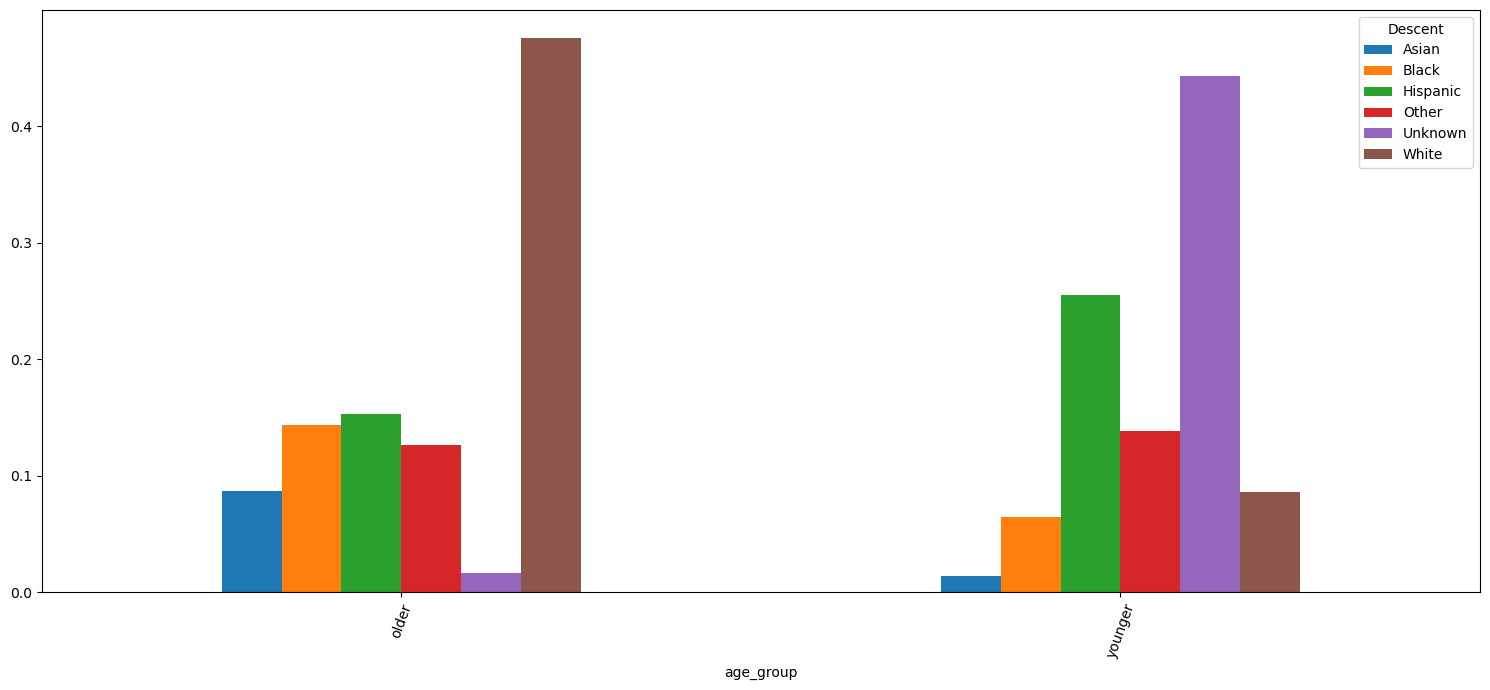

In [106]:
r4b_fig, r4b_ax = plt.subplots(ncols=1,figsize=(15, 7))
r4_descent_grouped.unstack(level=1).plot(y='percentage',kind='bar',subplots=False,rot=70,ax=r4b_ax)

plt.tight_layout()

<div class="alert alert-block alert-warning"> 
<b> Requirement 5 : (5 points) </b> Let's do an analysis on Hit and Run accidents. We saw that there are two MO codes that represent Hit and Run - 3029 and 3030. 
   
1. Use SQL to query all accidents with codes 3029 or 3030 along with the Division where the accident occurred.   
2. Compare the top 5 Divisions in Requirement 1 that included all accidents to the top 5 Divisions with Hit and Run accidents. How do these differ?
    
   


</div>

In [140]:
r5 = pd.read_sql_query("""
                        SELECT 
                            t.Division,
                            CASE
                                WHEN a.MO_Codes in ('3029','3030') 
                                    THEN 'H&R'
                                ELSE 'Other'
                                END AS mo_trans,
                            COUNT(*) AS COUNT
                        FROM traffic t
                        JOIN MO_accident a on a.DR_Number = t.DR_Number
                        WHERE mo_trans = 'H&R'
                        GROUP BY Division
                        """, engine)
r5.head(5)

,Division,mo_trans,COUNT
0,77th Street,H&R,16495
1,Central,H&R,8149
2,Devonshire,H&R,9502
3,Foothill,H&R,8336
4,Harbor,H&R,7575


<AxesSubplot:xlabel='Division', ylabel='COUNT'>

<AxesSubplot:xlabel='Division', ylabel='COUNT'>

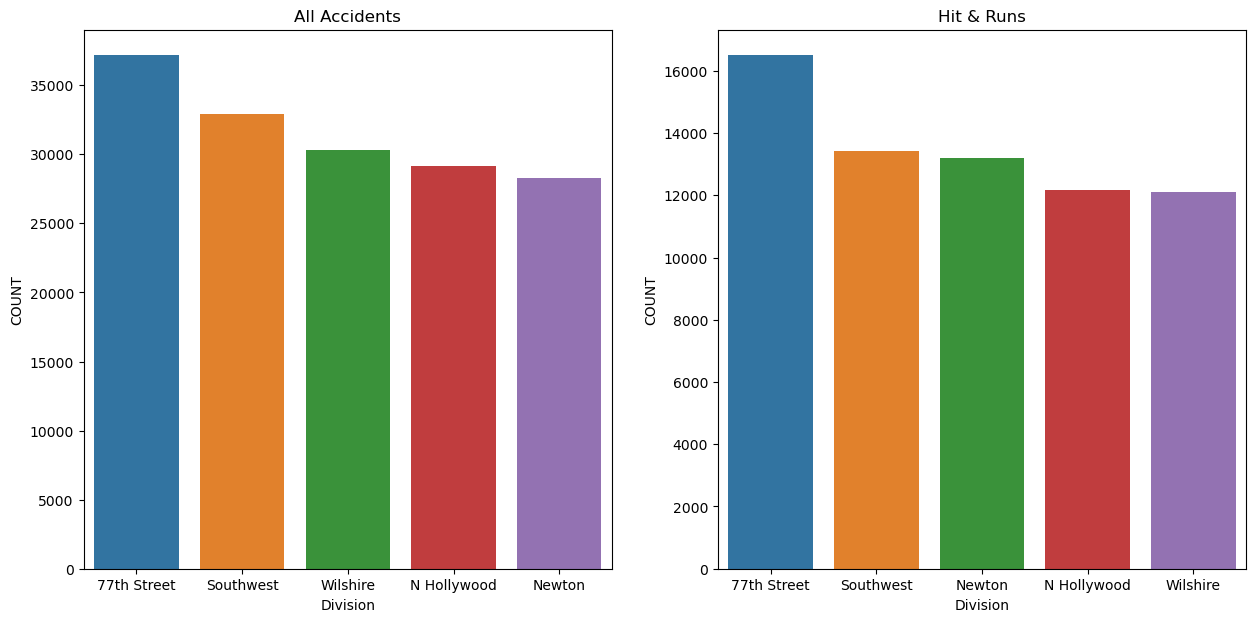

In [145]:
r1top5 = r1.nlargest(5,'COUNT')
r5top5 = r5.nlargest(5,'COUNT')

#using sns
r5_fig, f5_ax = plt.subplots(ncols=2,figsize=(15, 7))
sns.barplot(x='Division',y='COUNT',data=r1top5, ax=f5_ax[0])
sns.barplot(x='Division',y='COUNT',data=r5top5, ax=f5_ax[1])
f5_ax[0].title.set_text('All Accidents')
f5_ax[1].title.set_text('Hit & Runs')
# 1, 2, and 4 slots are the same when comparing all accs vs h&rs

<div class="alert alert-block alert-warning"> 
<b> Requirement 6 : (5 points) </b>  Use SQL to only select valid latititude and longitudes.  Once you have the data, use matplotlib to plot latitude, longitude and use the Division for hue.
    
- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
    
   


</div>

In [161]:
r6 = pd.read_sql_query("""
                        SELECT 
                            Latitude, 
                            Longitude, 
                            Division 
                        FROM traffic
                        WHERE
                            (Latitude BETWEEN 33.6 AND 34.4) AND
                            (Longitude BETWEEN -118.7 AND -118.1)
                        """, engine)
r6.head()



,Latitude,Longitude,Division
0,34.0255,-118.3002,Southwest
1,34.0256,-118.3089,Southwest
2,34.0738,-118.2078,Hollenbeck
3,34.0492,-118.2391,Central
4,34.0108,-118.3182,Southwest


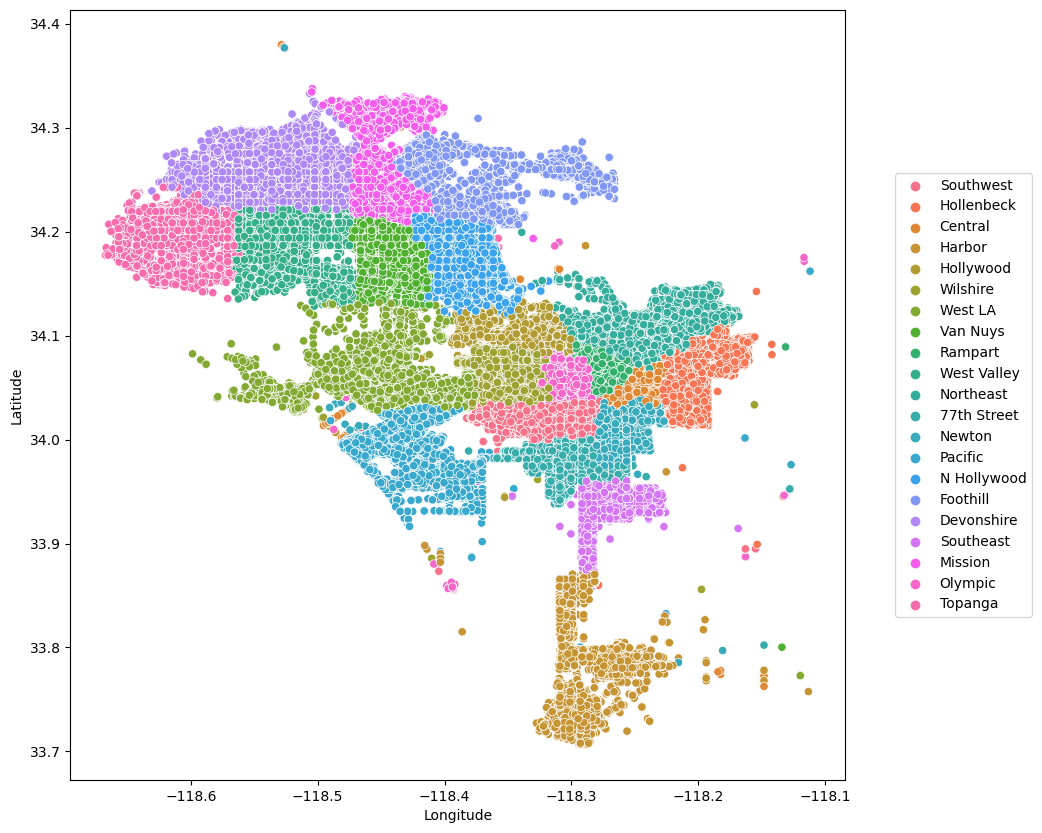

In [162]:
r6_fig, r6_ax = plt.subplots(figsize = (10,10))
r6_ax = sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = "Division", data = r6, legend='full')
r6_ax.legend(loc='right',bbox_to_anchor=(1.25,0.5),ncol=1)

<div class="alert alert-block alert-warning"> 
<b> Requirement 7: (5 points) </b>  Are the imputed records the same as the non-imputed records?  Select imputeAge, Gender and Descent.

- Compare Gender for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Gender?
- Compare Descent for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Descent?
    
   


</div>

In [166]:
r7 = pd.read_sql_query("""
                        SELECT 
                           imputeAge,
                           Gender,
                           Descent
                        FROM traffic
                        """, engine)
r7.head()



,imputeAge,Gender,Descent
0,0,Male,Hispanic
1,0,Female,Hispanic
2,1,Male,Unknown
3,0,Male,Hispanic
4,0,Male,Black


In [170]:
r7_gender = r7.groupby(['imputeAge','Gender']).agg(counts=('Gender','size'))
r7_gender['percentage'] = r7_gender.groupby(level=0).transform(lambda x: (x / x.sum()).round(3))
r7_gender

counts  percentage
imputeAge Gender                    
0         Female  192889       0.408
          Male    276568       0.585
          Other     3594       0.008
1         Female   16992       0.222
          Male     47928       0.627
          Other    11576       0.151

<AxesSubplot:xlabel='imputeAge'>

[Text(0, 0, '0.408'), Text(0, 0, '0.222')]

[Text(0, 0, '0.585'), Text(0, 0, '0.627')]

[Text(0, 0, '0.008'), Text(0, 0, '0.151')]

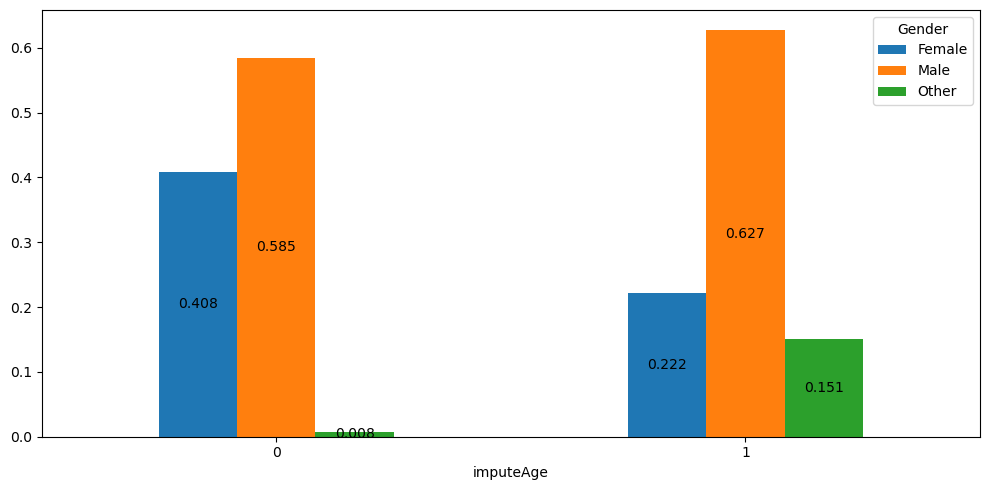

In [189]:
r7a_fig, r7a_ax = plt.subplots(ncols=1,figsize=(10, 5))
r7_gender.unstack(level=1).plot(y='percentage',kind='bar',subplots=False,rot=0,ax=r7a_ax)
for container in r7a_ax.containers:
    r7a_ax.bar_label(container,label_type='center')
plt.tight_layout()

The jump in 'Other from .8% to 15.1% is concerning for imputed age is a bit concerning. It throws off the ratio in non-imputed age which we can see the difference between Male and Female to be about 17.8%. Yet in our imputed group the difference is 40.5%. This could be an indicator that the records for which we had to impute age might be improperly created. Further investigation would need to be done to see if other factors are influencing this and if not, there is something that has a significantly higher accident rate for men versus womenmen.

In [171]:
r7_descent = r7.groupby(['imputeAge','Descent']).agg(counts=('Descent','size'))
r7_descent['percentage'] = r7_descent.groupby(level=0).transform(lambda x: (x / x.sum()).round(3))
r7_descent

counts  percentage
imputeAge Descent                     
0         Asian      26920       0.057
          Black      70380       0.149
          Hispanic  188439       0.398
          Other      59910       0.127
          Unknown    11554       0.024
          White     115848       0.245
1         Asian       1236       0.016
          Black       4338       0.057
          Hispanic   21445       0.280
          Other      18797       0.246
          Unknown    16893       0.221
          White      13787       0.180

<AxesSubplot:xlabel='imputeAge'>

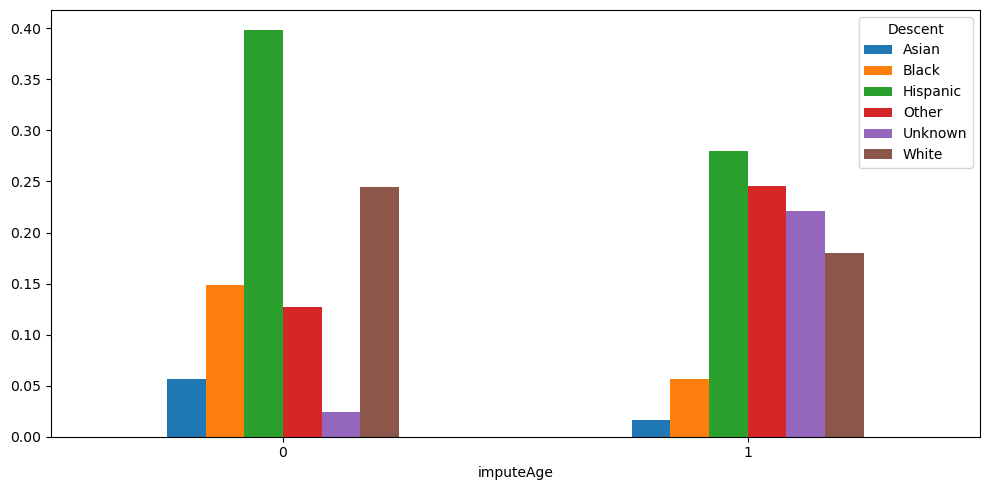

In [175]:
r7b_fig, r7b_ax = plt.subplots(ncols=1,figsize=(10, 5))
r7_descent.unstack(level=1).plot(y='percentage',kind='bar',subplots=False,rot=0,ax=r7b_ax)

plt.tight_layout()

Looking at 'Descent' we can see that patterns hold mostly true in the distribution between the two groups. However a marked increased in the 'Unknown' value causes the 'White' value to look smaller. So like above, further investigation needs to be done to determine why the Unknown rate is so high.